[View in Colaboratory](https://colab.research.google.com/github/MarcChevallier/Machine-Learning/blob/master/Heur%C3%ADstica.ipynb)

<h2>Heurística para Problemas Combinatórios - 2018.2 UNIRIO</h2>

---
  <h3>Proposições de Algoritmos para o Problema de Roteamento de Veículos  </h3>
     
---
  Etapas da investigação:
      

*   Elaboração de uma heurística construtiva para o problema de TSP
*   Implementação do Djikstra para o Problema de TSP
*   Modificação do problema para o Problema do Roteamento de Veículo (PRV)
*   Adição de restrições no problema PRV
<br>
**Ferramenta utilizada**: Python (Jupyter Notebook)


### Importando Pacotes

In [0]:
!pip install --upgrade -q gspread
import pandas as pd #Para trabalhar com DataFrames
import numpy as np #Para trabalhar com Arrays
import matplotlib.pyplot as plt #Para fazer gráficos
import gspread #Para fazer o link com uma planilha do Google Sheets

### Importando Instâncias

In [34]:
#@title
#Peço autorização do Google para Acessar os dados do Google Sheets
from google.colab import auth
from oauth2client.client import GoogleCredentials
auth.authenticate_user()
gc = gspread.authorize(GoogleCredentials.get_application_default())
#Digo o nome da planilha que está no meu Drive que quero acessar
worksheet = gc.open('Dados Heurística').sheet1 #primeira aba da planilha

# get_all_values gives a list of rows.
rows = worksheet.get_all_values()
rows

[['Depot', 'Cord x', 'Cord y', 'Demanda'],
 ['1', '30', '40', '0'],
 ['2', '37', '52', '7'],
 ['3', '49', '49', '30'],
 ['4', '52', '64', '16'],
 ['5', '20', '26', '9'],
 ['6', '40', '30', '21'],
 ['7', '21', '47', '15'],
 ['8', '17', '63', '19'],
 ['9', '31', '62', '23'],
 ['10', '52', '33', '11'],
 ['11', '51', '21', '5'],
 ['12', '42', '41', '19'],
 ['13', '31', '32', '29'],
 ['14', '5', '25', '23'],
 ['15', '12', '42', '21'],
 ['16', '36', '16', '10']]

In [0]:
dados = np.array(rows[1:]).astype(int) #Tirar cabeçalho e String
x= dados[:,1] 
y= dados[:,2]
client = dados[:,0]-1 #client[0] é o deposito (que é igual a zero)
n = len(client) #tamanho da instância

**Exemplo Roteamento Aleatório**

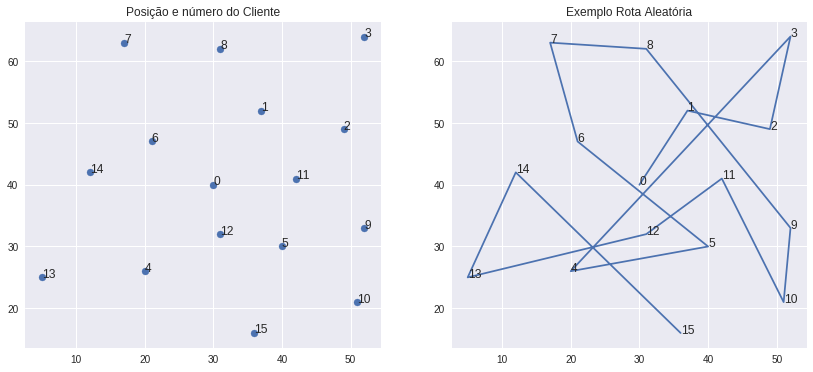

In [114]:
#@title
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(14, 6))

ax[0].scatter(x,y)
for i in range(0,n):
  ax[0].annotate(client[i], (x[i],y[i]))
ax[0].set_title("Posição e número do Cliente")

ax[1].plot(x,y)
for i in range(0,n):
    ax[1].annotate(client[i], (x[i],y[i]))
ax[1].set_title("Exemplo Rota Aleatória");


In [0]:
def euclidean(x,y,i,f):
    return ((x[i]-x[f])**2 + (y[i]-y[f])**2)**0.5

In [158]:
custo=0
for i in range(1,n):
  custo = custo +euclidean(x,y,i,i-1)
print("Distância Percorrida:")
custo

Distância Percorrida:


332.3422729071748

### Implementação de Uma Heurística Construtiva: Neighrest Neighbour

These are the steps of the algorithm:

start on an arbitrary vertex as current vertex.
find out the shortest edge connecting current vertex and an unvisited vertex V.
set current vertex to V.
mark V as visited.
if all the vertices in domain are visited, then terminate.
Go to step 2.

In [159]:
sol = [0]*(n)
insol = [1]+[0]*(n-1)
pos = 1
cor = 0
custo = 0

for i in range(n-1):
  dist_min = math.inf
  for j in range(1,n):
    if (j!=cor) and (insol[j]!=1):
      dist= euclidean(x, y, j, cor)
      if dist<dist_min:
          viz = j
          dist_min = dist
  custo = custo + dist_min
  cor=viz
  sol[pos] = viz
  insol[viz] = 1
  pos=pos+1
# dist = entre 0 viz  
custo = custo + dist 

print(insol)
print(sol)
print(custo)

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
[0, 12, 5, 11, 2, 1, 8, 7, 6, 14, 4, 13, 15, 10, 9, 3]
259.00207792458775


**Solução Aleatória teve custo de 332 e com a heurística foi para 259**

Custo com Volta ao Depósito:
290.11477629679587


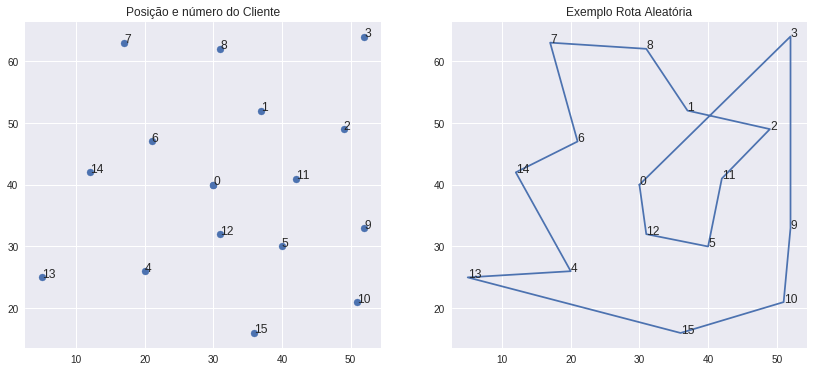

In [146]:
#@title
sol1 = [x+1 for x in sol] +[1]
rota = pd.merge(pd.DataFrame(sol1), pd.DataFrame(dados), on=0, how='left')
client1 = np.array(rota[0])-1
x1 = np.array(rota[1])
y1 = np.array(rota[2])
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(14, 6))

ax[0].scatter(x1,y1)
for i in range(0,n):
  ax[0].annotate(client1[i], (x1[i],y1[i]))
ax[0].set_title("Posição e número do Cliente")

ax[1].plot(x1,y1)
for i in range(0,n):
    ax[1].annotate(client1[i], (x1[i],y1[i]))
ax[1].set_title("Exemplo Rota Aleatória");

print("Custo com Volta ao Depósito:")
print(custo+euclidean(x1,x1,0,j))

**Resultado Esperado Atingido**

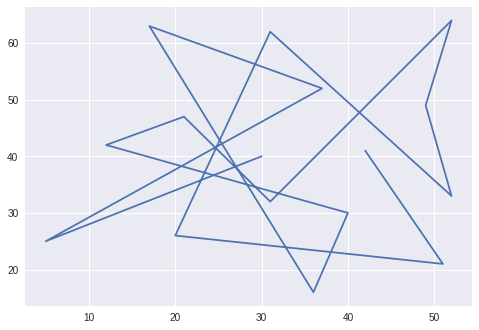

In [221]:
data = pd.DataFrame(sol)
data.columns = ['ver']
data = pd.merge(data,df, on='ver', how='left')
data = data.apply(pd.to_numeric, errors='coerce')
fig, ax = plt.subplots()
ax.plot(data['Cx'],data['Cy'])
#for i in range(1,n+1):
 # ax.annotate(data['ver'][i], (data['Cx'][i],data['Cy'][i]))

In [71]:
for i in range(1,4):
  print(i)

1
2
3


In [126]:
from math import sqrt
n = len(df.iloc[:,0])

insol = [1,0,0,0]
sol = [0,0,0,0]
pos = 1
cor = 0
custo = 0
for i in range(n-1):
  dist_min = 999999999999
  for j in range(1,n):
    if (j != cor) and (insol[j] != 1):
      dist = df['Cord x'][j]-df['Cord x'][cor])^2 + (df['Cord y'][j]-df['Cord y'][cor])^2)^(-1)
      if dis<dist_min:
        viz = j
        dist_min = dist
  custo = custo + distmin
  cor=viz
  sol[pos] = viz
  insol[viz] = 1
  pos=pos+1
# dist = entre 0 viz  
custo = custo + dist 
print(insol)
print(sol)
  

SyntaxError: ignored

In [42]:
fruits = ["apple", "banana", "cherry"]
for i in range(n):
  print()

NameError: ignored

In [52]:
from math import sqrt

cords = {}
cords['Boston'] = (5, 2)
cords['Phoenix'] = (7, 3)
cords['New York'] = (8, 1)

def dist(a, b):
    d = [a[0] - b[0], a[1] - b[1]]
    return sqrt(d[0] * d[0] + d[1] * d[1]) 

D = {}

for city1, cords1 in cords.items():
    D[city1] = {}
    for city2, cords2 in cords.items():
        D[city1][city2] = dist(cords1, cords2)   

for city1, v in D.items():
    for city2, d in v.items():
        print (city1, city2, d)

Boston Boston 0.0
Boston Phoenix 2.23606797749979
Boston New York 3.1622776601683795
Phoenix Boston 2.23606797749979
Phoenix Phoenix 0.0
Phoenix New York 2.23606797749979
New York Boston 3.1622776601683795
New York Phoenix 2.23606797749979
New York New York 0.0


In [50]:
cords

{'Boston': (5, 2), 'New York': (8, 1), 'Phoenix': (7, 3)}

In [13]:
"""Vehicle Routing Problem"""
from __future__ import print_function
from six.moves import xrange
from ortools.constraint_solver import pywrapcp
from ortools.constraint_solver import routing_enums_pb2

###########################
# Problem Data Definition #
###########################
class CityBlock():
    """City block definition"""
    @property
    def width(self):
        """Gets Block size West to East"""
        return 228/2

    @property
    def height(self):
        """Gets Block size North to South"""
        return 80

class DataProblem():
    """Stores the data for the problem"""
    def __init__(self):
        """Initializes the data for the problem"""
        self._num_vehicles = 4

        # Locations in block unit
        locations = \
                [(4, 4), # depot
                 (2, 0), (8, 0), # row 0
                 (0, 1), (1, 1),
                 (5, 2), (7, 2),
                 (3, 3), (6, 3),
                 (5, 5), (8, 5),
                 (1, 6), (2, 6),
                 (3, 7), (6, 7),
                 (0, 8), (7, 8)]
        # locations in meters using the city block dimension
        city_block = CityBlock()
        self._locations = [(
            loc[0]*city_block.width,
            loc[1]*city_block.height) for loc in locations]

        self._depot = 0

    @property
    def num_vehicles(self):
        """Gets number of vehicles"""
        return self._num_vehicles

    @property
    def locations(self):
        """Gets locations"""
        return self._locations

    @property
    def num_locations(self):
        """Gets number of locations"""
        return len(self.locations)

    @property
    def depot(self):
        """Gets depot location index"""
        return self._depot

#######################
# Problem Constraints #
#######################
def manhattan_distance(position_1, position_2):
    """Computes the Manhattan distance between two points"""
    return (abs(position_1[0] - position_2[0]) +
            abs(position_1[1] - position_2[1]))

class CreateDistanceEvaluator(object): # pylint: disable=too-few-public-methods
    """Creates callback to return distance between points."""
    def __init__(self, data):
        """Initializes the distance matrix."""
        self._distances = {}

        # precompute distance between location to have distance callback in O(1)
        for from_node in xrange(data.num_locations):
            self._distances[from_node] = {}
            for to_node in xrange(data.num_locations):
                if from_node == to_node:
                    self._distances[from_node][to_node] = 0
                else:
                    self._distances[from_node][to_node] = (
                        manhattan_distance(
                            data.locations[from_node],
                            data.locations[to_node]))

    def distance_evaluator(self, from_node, to_node):
        """Returns the manhattan distance between the two nodes"""
        return self._distances[from_node][to_node]

def add_distance_dimension(routing, distance_evaluator):
    """Add Global Span constraint"""
    distance = "Distance"
    maximum_distance = 3000
    routing.AddDimension(
        distance_evaluator,
        0, # null slack
        maximum_distance, # maximum distance per vehicle
        True, # start cumul to zero
        distance)
    distance_dimension = routing.GetDimensionOrDie(distance)
    # Try to minimize the max distance among vehicles.
    # /!\ It doesn't mean the standard deviation is minimized
    distance_dimension.SetGlobalSpanCostCoefficient(100)

###########
# Printer #
###########
class ConsolePrinter():
    """Print solution to console"""
    def __init__(self, data, routing, assignment):
        """Initializes the printer"""
        self._data = data
        self._routing = routing
        self._assignment = assignment

    @property
    def data(self):
        """Gets problem data"""
        return self._data

    @property
    def routing(self):
        """Gets routing model"""
        return self._routing

    @property
    def assignment(self):
        """Gets routing model"""
        return self._assignment

    def print(self):
        """Prints assignment on console"""
        # Inspect solution.
        total_dist = 0
        for vehicle_id in xrange(self.data.num_vehicles):
            index = self.routing.Start(vehicle_id)
            plan_output = 'Route for vehicle {0}:\n'.format(vehicle_id)
            route_dist = 0
            while not self.routing.IsEnd(index):
                node_index = self.routing.IndexToNode(index)
                next_node_index = self.routing.IndexToNode(
                    self.assignment.Value(self.routing.NextVar(index)))
                route_dist += manhattan_distance(
                    self.data.locations[node_index],
                    self.data.locations[next_node_index])
                plan_output += ' {node_index} -> '.format(
                    node_index=node_index)
                index = self.assignment.Value(self.routing.NextVar(index))

            node_index = self.routing.IndexToNode(index)
            total_dist += route_dist
            plan_output += ' {node_index}\n'.format(
                node_index=node_index)
            plan_output += 'Distance of the route {0}: {dist}\n'.format(
                vehicle_id,
                dist=route_dist)
            print(plan_output)
        print('Total Distance of all routes: {dist}'.format(dist=total_dist))

########
# Main #
########
def main():
    """Entry point of the program"""
    # Instantiate the data problem.
    data = DataProblem()

    # Create Routing Model
    routing = pywrapcp.RoutingModel(data.num_locations, data.num_vehicles, data.depot)
    # Define weight of each edge
    distance_evaluator = CreateDistanceEvaluator(data).distance_evaluator
    routing.SetArcCostEvaluatorOfAllVehicles(distance_evaluator)
    add_distance_dimension(routing, distance_evaluator)

    # Setting first solution heuristic (cheapest addition).
    search_parameters = pywrapcp.RoutingModel.DefaultSearchParameters()
    search_parameters.first_solution_strategy = (
        routing_enums_pb2.FirstSolutionStrategy.PATH_CHEAPEST_ARC)
    # Solve the problem.
    assignment = routing.SolveWithParameters(search_parameters)
    printer = ConsolePrinter(data, routing, assignment)
    printer.print()

if __name__ == '__main__':
  main()

Route for vehicle 0:
 0 ->  8 ->  6 ->  2 ->  5 ->  0
Distance of the route 0: 1552.0

Route for vehicle 1:
 0 ->  7 ->  1 ->  4 ->  3 ->  0
Distance of the route 1: 1552.0

Route for vehicle 2:
 0 ->  9 ->  10 ->  16 ->  14 ->  0
Distance of the route 2: 1552.0

Route for vehicle 3:
 0 ->  12 ->  11 ->  15 ->  13 ->  0
Distance of the route 3: 1552.0

Total Distance of all routes: 6208.0


In [0]:
"""Capacitated Vehicle Routing Problem"""
from __future__ import print_function
from six.moves import xrange
from ortools.constraint_solver import pywrapcp
from ortools.constraint_solver import routing_enums_pb2

###########################
# Problem Data Definition #
###########################
class Vehicle():
    """Stores the property of a vehicle"""
    def __init__(self):
        """Initializes the vehicle properties"""
        self._capacity = 15

    @property
    def capacity(self):
        """Gets vehicle capacity"""
        return self._capacity

class CityBlock():
    """City block definition"""
    @property
    def width(self):
        """Gets Block size West to East"""
        return 228/2

    @property
    def height(self):
        """Gets Block size North to South"""
        return 80

class DataProblem():
    """Stores the data for the problem"""
    def __init__(self):
        """Initializes the data for the problem"""
        self._vehicle = Vehicle()
        self._num_vehicles = 4

        # Locations in block unit
        locations = \
                [(4, 4), # depot
                 (2, 0), (8, 0), # row 0
                 (0, 1), (1, 1),
                 (5, 2), (7, 2),
                 (3, 3), (6, 3),
                 (5, 5), (8, 5),
                 (1, 6), (2, 6),
                 (3, 7), (6, 7),
                 (0, 8), (7, 8)]
        # locations in meters using the city block dimension
        city_block = CityBlock()
        self._locations = [(
            loc[0]*city_block.width,
            loc[1]*city_block.height) for loc in locations]

        self._depot = 0

        self._demands = \
            [0, # depot
             1, 1, # row 0
             2, 4,
             2, 4,
             8, 8,
             1, 2,
             1, 2,
             4, 4,
             8, 8]

    @property
    def vehicle(self):
        """Gets a vehicle"""
        return self._vehicle

    @property
    def num_vehicles(self):
        """Gets number of vehicles"""
        return self._num_vehicles

    @property
    def locations(self):
        """Gets locations"""
        return self._locations

    @property
    def num_locations(self):
        """Gets number of locations"""
        return len(self.locations)

    @property
    def depot(self):
        """Gets depot location index"""
        return self._depot

    @property
    def demands(self):
        """Gets demands at each location"""
        return self._demands

#######################
# Problem Constraints #
#######################
def manhattan_distance(position_1, position_2):
    """Computes the Manhattan distance between two points"""
    return (abs(position_1[0] - position_2[0]) +
            abs(position_1[1] - position_2[1]))

class CreateDistanceEvaluator(object): # pylint: disable=too-few-public-methods
    """Creates callback to return distance between points."""
    def __init__(self, data):
        """Initializes the distance matrix."""
        self._distances = {}

        # precompute distance between location to have distance callback in O(1)
        for from_node in xrange(data.num_locations):
            self._distances[from_node] = {}
            for to_node in xrange(data.num_locations):
                if from_node == to_node:
                    self._distances[from_node][to_node] = 0
                else:
                    self._distances[from_node][to_node] = (
                        manhattan_distance(
                            data.locations[from_node],
                            data.locations[to_node]))

    def distance_evaluator(self, from_node, to_node):
        """Returns the manhattan distance between the two nodes"""
        return self._distances[from_node][to_node]

class CreateDemandEvaluator(object): # pylint: disable=too-few-public-methods
    """Creates callback to get demands at each location."""
    def __init__(self, data):
        """Initializes the demand array."""
        self._demands = data.demands

    def demand_evaluator(self, from_node, to_node):
        """Returns the demand of the current node"""
        del to_node
        return self._demands[from_node]

def add_capacity_constraints(routing, data, demand_evaluator):
    """Adds capacity constraint"""
    capacity = "Capacity"
    routing.AddDimension(
        demand_evaluator,
        0, # null capacity slack
        data.vehicle.capacity, # vehicle maximum capacity
        True, # start cumul to zero
        capacity)

###########
# Printer #
###########
class ConsolePrinter():
    """Print solution to console"""
    def __init__(self, data, routing, assignment):
        """Initializes the printer"""
        self._data = data
        self._routing = routing
        self._assignment = assignment

    @property
    def data(self):
        """Gets problem data"""
        return self._data

    @property
    def routing(self):
        """Gets routing model"""
        return self._routing

    @property
    def assignment(self):
        """Gets routing model"""
        return self._assignment

    def print(self):
        """Prints assignment on console"""
        # Inspect solution.
        total_dist = 0
        for vehicle_id in xrange(self.data.num_vehicles):
            index = self.routing.Start(vehicle_id)
            plan_output = 'Route for vehicle {0}:\n'.format(vehicle_id)
            route_dist = 0
            route_load = 0
            while not self.routing.IsEnd(index):
                node_index = self.routing.IndexToNode(index)
                next_node_index = self.routing.IndexToNode(
                    self.assignment.Value(self.routing.NextVar(index)))
                route_dist += manhattan_distance(
                    self.data.locations[node_index],
                    self.data.locations[next_node_index])
                route_load += self.data.demands[node_index]
                plan_output += ' {0} Load({1}) -> '.format(node_index, route_load)
                index = self.assignment.Value(self.routing.NextVar(index))

            node_index = self.routing.IndexToNode(index)
            total_dist += route_dist
            plan_output += ' {0} Load({1})\n'.format(node_index, route_load)
            plan_output += 'Distance of the route: {0}m\n'.format(route_dist)
            plan_output += 'Load of the route: {0}\n'.format(route_load)
            print(plan_output)
        print('Total Distance of all routes: {0}m'.format(total_dist))

########
# Main #
########
def main():
    """Entry point of the program"""
    # Instantiate the data problem.
    data = DataProblem()

    # Create Routing Model
    routing = pywrapcp.RoutingModel(data.num_locations, data.num_vehicles, data.depot)
    # Define weight of each edge
    distance_evaluator = CreateDistanceEvaluator(data).distance_evaluator
    routing.SetArcCostEvaluatorOfAllVehicles(distance_evaluator)
    # Add Capacity constraint
    demand_evaluator = CreateDemandEvaluator(data).demand_evaluator
    add_capacity_constraints(routing, data, demand_evaluator)

    # Setting first solution heuristic (cheapest addition).
    search_parameters = pywrapcp.RoutingModel.DefaultSearchParameters()
    search_parameters.first_solution_strategy = (
        routing_enums_pb2.FirstSolutionStrategy.PATH_CHEAPEST_ARC)
    # Solve the problem.
    assignment = routing.SolveWithParameters(search_parameters)
    printer = ConsolePrinter(data, routing, assignment)
    printer.print()

if __name__ == '__main__':
  main()

In [0]:
https://www.youtube.com/watch?v=enCBp2lBn64
https://developers.google.com/optimization/routing/cvrp
  